<a href="https://colab.research.google.com/github/umairakhtar/Colab-INFO7374-Assignment2/blob/master/A2Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os, zipfile, io, requests
URL = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'
def download_images(url):
    r = requests.get(url, stream=True)
    print ('Downloading ' + url )
    zip_ref = zipfile.ZipFile(io.BytesIO(r.content))
    zip_ref.extractall('./')
    zip_ref.close()
download_images(URL) #To download

In [0]:
import numpy as np
from PIL import Image
import six.moves.cPickle as pickle

data = {}
data['train'] = {}
data['test'] = {}
data['train']['data'] = []
data['train']['target'] = []
data['test']['data'] = []
data['test']['target'] = []
size = (32, 32)
N = 400 ##400 as testing and 100 as training in each class

wnids = list(map(lambda x: x.strip(), open('tiny-imagenet-200/wnids.txt').readlines()))

for i in range(len(wnids)):
    wnid = wnids[i]
    print ("{}: {} / {}".format(wnid, i + 1, len(wnids)))
    for j in range(500):
        path = "tiny-imagenet-200/train/{0}/images/{0}_{1}.JPEG".format(wnid, j)
        image = (Image.open(path).convert('RGB'))
        image = image.resize(size, Image.ANTIALIAS)
        image = np.array(image)
        if j < N:
            data['train']['data'].append(image)
            data['train']['target'].append(i)
        else:
            data['test']['data'].append(image)
            data['test']['target'].append(i)
            

print ("Dump to train.pkl...")
pickle.dump(data, open('train.pkl', 'wb', -1))

n02124075: 1 / 200
n04067472: 2 / 200
n04540053: 3 / 200
n04099969: 4 / 200
n07749582: 5 / 200
n01641577: 6 / 200
n02802426: 7 / 200
n09246464: 8 / 200
n07920052: 9 / 200
n03970156: 10 / 200
n03891332: 11 / 200
n02106662: 12 / 200
n03201208: 13 / 200
n02279972: 14 / 200
n02132136: 15 / 200
n04146614: 16 / 200
n07873807: 17 / 200
n02364673: 18 / 200
n04507155: 19 / 200
n03854065: 20 / 200
n03838899: 21 / 200
n03733131: 22 / 200
n01443537: 23 / 200
n07875152: 24 / 200
n03544143: 25 / 200
n09428293: 26 / 200
n03085013: 27 / 200
n02437312: 28 / 200
n07614500: 29 / 200
n03804744: 30 / 200
n04265275: 31 / 200
n02963159: 32 / 200
n02486410: 33 / 200
n01944390: 34 / 200
n09256479: 35 / 200
n02058221: 36 / 200
n04275548: 37 / 200
n02321529: 38 / 200
n02769748: 39 / 200
n02099712: 40 / 200
n07695742: 41 / 200
n02056570: 42 / 200
n02281406: 43 / 200
n01774750: 44 / 200
n02509815: 45 / 200
n03983396: 46 / 200
n07753592: 47 / 200
n04254777: 48 / 200
n02233338: 49 / 200
n04008634: 50 / 200
n02823428

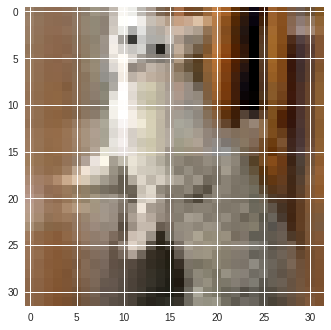

2


In [0]:
import matplotlib.pyplot as plt
import six.moves.cPickle as pickle
data=pickle.load(open("train.pkl",'rb'))
#data['train']['data'][750]
plt.imshow(data['train']['data'][50])
plt.show()
print(data['train']['target'][950])

In [0]:
# import keras
# import pandas as pd
# (x_train, y_train), (x_test, y_test) = (data['train']['data'],data['train']['target']),(data['test']['data'],data['test']['target'])
# num_classes=1000
# x_train = np.array(x_train)
# x_test = np.array(x_test)
# x_train =x_train/ 255
# x_test = x_test/255
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
!pip install autokeras

    100% |████████████████████████████████| 102kB 8.3MB/s 
    100% |████████████████████████████████| 26.6MB 1.8MB/s 
    100% |████████████████████████████████| 560.1MB 26kB/s 
    100% |████████████████████████████████| 13.9MB 2.5MB/s 
    100% |████████████████████████████████| 25.3MB 1.0MB/s 
    100% |████████████████████████████████| 51kB 21.5MB/s 
    100% |████████████████████████████████| 83.1MB 692kB/s 
    100% |████████████████████████████████| 61kB 22.1MB/s 
    100% |████████████████████████████████| 8.9MB 966kB/s 
    100% |████████████████████████████████| 1.6MB 6.8MB/s 
    100% |████████████████████████████████| 1.4MB 5.1MB/s 
    100% |████████████████████████████████| 143kB 17.9MB/s 
    100% |████████████████████████████████| 25.4MB 1.6MB/s 
    100% |████████████████████████████████| 2.0MB 7.8MB/s 
    100% |████████████████████████████████| 706kB 9.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/20/b7/59/3a1011287e69e559553751f400a6b3874448e94f66cb0745ba
 

In [0]:
import autokeras as ak

Using TensorFlow backend.


In [0]:
import keras
#from keras.datasets import mnist
#from autokeras.image_supervised import ImageClassifier
import numpy as np
# loading mnist from keras
(x_train, y_train), (x_test, y_test) = (data['train']['data'],data['train']['target']),(data['test']['data'],data['test']['target'])
#num_classes=1000
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train =x_train/ 255
x_test = x_test/255
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = x_train.reshape(x_train.shape + (1,))
X_test = x_test.reshape(x_test.shape + (1,))

# initialize the classifier
clf = ak.ImageClassifier(verbose=True)

clf.fit(X_train, y_train, time_limit=12 * 60 * 60)

Saving Directory: /tmp/autokeras_PSUAKT
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   13.29341893196106    |  0.23199999999999998   |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
Epoch-6, Current Metric - 0.22

KeyboardInterrupt: ignored

Second run test

In [0]:
import keras
#from keras.datasets import mnist
#from autokeras.image_supervised import ImageClassifier
import numpy as np
# loading mnist from keras
(x_train, y_train), (x_test, y_test) = (data['train']['data'],data['train']['target']),(data['test']['data'],data['test']['target'])
#num_classes=1000
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train =x_train/ 255
x_test = x_test/255
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
X_train = x_train.reshape(x_train.shape + (1,))
X_test = x_test.reshape(x_test.shape + (1,))

# initialize the classifier
clf = ak.ImageClassifier(verbose=True, augment=True, searcher_args={'trainer_args':{'max_iter_num':7}})

clf.fit(X_train, y_train, time_limit=1 * 60 * 60)

Saving Directory: /tmp/autokeras_LCCO9H
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   15.112647819519044   |         0.1552         |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
Epoch-2, Current Metric - 0.052:  50%|███████████▉            | 3

In [0]:
clf.final_fit(X_train, y_train, X_test, y_test, retrain=False)


No loss decrease after 30 epochs.



In [0]:
y_pred = clf.evaluate(X_test, y_test)
print(y_pred)

0.2716


In [0]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_true=y_test, y_pred=y_pred)

0.2716

In [0]:
import keras
#from keras.datasets import mnist
#from autokeras.image_supervised import ImageClassifier
import numpy as np
# loading mnist from keras
(x_train, y_train), (x_test, y_test) = (data['train']['data'],data['train']['target']),(data['test']['data'],data['test']['target'])
#num_classes=1000
x_train = np.array(x_train)
x_test = np.array(x_test)
X_train =x_train/ 255
x_test = x_test/255
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)
# X_train = x_train.reshape(x_train.shape + (1,))
# X_test = x_test.reshape(x_test.shape + (1,))

# initialize the classifier
clf = ak.ImageClassifier(verbose=True, augment=True, searcher_args={'trainer_args':{'max_iter_num':1}})

clf.fit(X_train, y_train, time_limit=2 * 60 * 60)

Saving Directory: /tmp/autokeras_BD60E2
Preprocessing the images.
Preprocessing finished.
